In [ ]:
pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 6.1 MB/s eta 0:00:00


In [ ]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

## Função para obtenção dos parâmetros

In [ ]:
def my_step_info(t,curva):
  peak_time=t[np.argmax(curva)];
  Overshoot=(curva.max()/curva[-1]-1)*100
  for i in range(0,len(curva)-1):
    if(curva[i]>curva[-1]*.10):
      i_10=i
      break
  for i in range(0,len(curva)-1):
    if(curva[i]>curva[-1]*.90):
      i_90=i
      break
  Rise_Time=(t[i_90]-t[i_10])
  for i in range(2,len(curva)-1):
    if(abs(curva[-i]/curva[-1])>1.02) or (abs(curva[-i]/curva[-1])<0.98):
      qst=i
      break
  Settling_Time=(t[len(curva)-qst])
  return peak_time, Overshoot, Rise_Time, Settling_Time

## Cria a função de transferênca


In [ ]:
Tsim = 10;
quais_T = np.linspace(-1.,Tsim,1000)

H_s = ctl.tf([9.],[1.,3.,9.])
print('FT = ',H_s)

FT =  <TransferFunction>: sys[1]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      9
-------------
s^2 + 3 s + 9



## Obtém os parâmetros da resposta ao degrau

In [ ]:
T_mf,yout_mf = ctl.step_response(H_s, quais_T[quais_T > 0])
tp,os,tr,ts = my_step_info(T_mf,yout_mf)
print('peak time = {:0.2f} s'.format(tp))
print('Overshoot = {:0.2f} %'.format(os))
print('Rise Time = {:0.2f} s'.format(tr))
print('Settling Time = {:0.2f} s'.format(ts))

peak time = 1.21 s
Overshoot = 16.30 %
Rise Time = 0.55 s
Settling Time = 2.69 s


## Plotar os Resultados

Text(0.5, 1.0, 'Sistema H(s)')

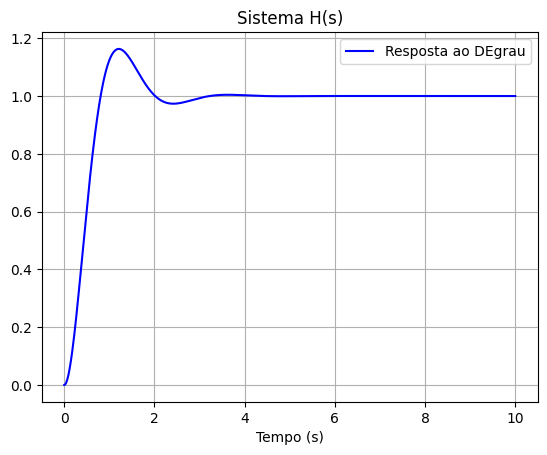

In [ ]:
plt.figure()
plt.plot(T_mf,yout_mf,'b-')
plt.xlabel('Tempo (s)')
plt.legend(['Resposta ao DEgrau'])
plt.grid()
plt.title('Sistema H(s)')